# Multiple Linear Regression
## Bike Sharing Assignment


#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os


In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
bike = pd.read_excel('/content/gdrive/MyDrive/Ciencia de Datos/Taller 2/Data_Taller_2.xlsx')
bike

,instant,Date,Year,Month,Day,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1.0,2020-01-01,2020.0,1.0,1.0,Springer,No,Mist + Cloudy,8.175849e+06,9.090375e+06,0.805833,1.074988e+07,331.0,654.0,985.0
1,2.0,2020-01-02,2020.0,1.0,2.0,Springer,No,Mist + Cloudy,9.083466e+06,8.625733e+06,0.696087,-1.665211e+07,131.0,670.0,801.0
2,3.0,2020-01-03,2020.0,1.0,3.0,Springer,No,Few clouds,1.229108e+06,9.020350e-01,0.437273,1.663670e+07,120.0,1229.0,1349.0
3,4.0,2020-01-04,2020.0,1.0,4.0,Springer,No,Few clouds,1.400000e+00,1.969734e+06,0.590435,1.073983e+07,108.0,1454.0,1562.0
4,5.0,2020-01-05,2020.0,1.0,5.0,Springer,No,Partly cloudy,2.666979e+06,2.775690e+05,0.436957,1.252230e+05,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,727.0,2021-12-27,2021.0,12.0,27.0,Springer,No,Mist + Cloudy,3.945849e+00,2.652174e+00,0.652917,2.345891e+01,247.0,1867.0,2114.0
722,728.0,2021-12-28,2021.0,12.0,28.0,Springer,No,Mist + Few clouds,3.906651e+00,3.987162e+00,0.590000,1.041656e+01,644.0,2451.0,3095.0
723,729.0,2021-12-29,2021.0,12.0,29.0,Springer,No,Mist,3.906651e+00,3.392800e+00,0.752917,8.333661e+00,159.0,1182.0,1341.0
724,730.0,2021-12-30,2021.0,12.0,30.0,Springer,No,Few clouds,4.024151e+00,2.889900e+00,0.483333,2.350052e+01,364.0,1432.0,1796.0


In [6]:
# Check the head of the dataset
bike.head()

,instant,Date,Year,Month,Day,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1.0,2020-01-01,2020.0,1.0,1.0,Springer,No,Mist + Cloudy,8175849.0,9.090375e+06,0.805833,10749882.0,331.0,654.0,985.0
1,2.0,2020-01-02,2020.0,1.0,2.0,Springer,No,Mist + Cloudy,9083466.0,8.625733e+06,0.696087,-16652113.0,131.0,670.0,801.0
2,3.0,2020-01-03,2020.0,1.0,3.0,Springer,No,Few clouds,1229108.0,9.020350e-01,0.437273,16636703.0,120.0,1229.0,1349.0
3,4.0,2020-01-04,2020.0,1.0,4.0,Springer,No,Few clouds,1.4,1.969734e+06,0.590435,10739832.0,108.0,1454.0,1562.0
4,5.0,2020-01-05,2020.0,1.0,5.0,Springer,No,Partly cloudy,2666979.0,2.775690e+05,0.436957,125223.0,82.0,1518.0,1600.0


In [7]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     726 non-null    float64       
 1   Date        726 non-null    datetime64[ns]
 2   Year        726 non-null    float64       
 3   Month       726 non-null    float64       
 4   Day         726 non-null    float64       
 5   Season      726 non-null    object        
 6   Holiday     726 non-null    object        
 7   Weather     726 non-null    object        
 8   Temp        726 non-null    float64       
 9   Feel_Temp   726 non-null    float64       
 10  Hum         726 non-null    float64       
 11  Wind        726 non-null    float64       
 12  Casual      726 non-null    float64       
 13  Registered  726 non-null    float64       
 14  cnt         726 non-null    float64       
dtypes: datetime64[ns](1), float64(11), object(3)
memory usage: 85.2+ KB


In [8]:
bike.describe()

,instant,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
count,726.000000,726.000000,726.000000,726.000000,7.260000e+02,7.260000e+02,726.000000,7.260000e+02,726.000000,726.000000,726.000000
mean,365.710744,2020.500000,6.519284,15.716253,3.601389e+05,4.914979e+05,0.668853,1.849241e+06,849.630854,3662.168044,4511.798898
std,211.050219,0.500345,3.451982,8.820474,3.401804e+06,3.025228e+06,0.660150,5.905126e+06,687.738418,1558.369158,1935.613470
min,1.000000,2020.000000,1.000000,1.000000,-5.220871e+07,-4.283729e+07,0.000000,-1.665211e+07,2.000000,20.000000,22.000000
25%,183.250000,2020.000000,4.000000,8.000000,1.013415e+01,1.036619e+01,0.520521,9.177811e+00,316.250000,2506.250000,3191.000000
50%,365.500000,2020.500000,7.000000,16.000000,1.851585e+01,1.757759e+01,0.626250,1.266732e+01,717.000000,3669.500000,4551.000000
75%,547.750000,2021.000000,10.000000,23.000000,2.551686e+01,2.300731e+01,0.731042,1.830216e+01,1096.500000,4783.250000,5966.000000
max,731.000000,2021.000000,12.000000,31.000000,1.894665e+07,1.751766e+07,10.867083,6.000868e+07,3410.000000,6946.000000,8714.000000


In [9]:
# Check the shape of df

print(bike.shape)

(726, 15)


## Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [10]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
Date          0.0
Year          0.0
Month         0.0
Day           0.0
Season        0.0
Holiday       0.0
Weather       0.0
Temp          0.0
Feel_Temp     0.0
Hum           0.0
Wind          0.0
Casual        0.0
Registered    0.0
cnt           0.0
dtype: float64

In [11]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
477    0.0
479    0.0
480    0.0
481    0.0
      ... 
243    0.0
244    0.0
245    0.0
246    0.0
725    0.0
Length: 726, dtype: float64

## Finding
There are no missing / Null values either in columns or rows

## Duplicate Check

In [12]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [13]:
bike_dup.shape

(726, 15)

In [14]:
bike.shape

(726, 15)

### Insights 

The shape after running the drop duplicate command is same as the original dataframe. 

Hence we can conclude that there were zero duplicate values in the dataset. 

## Data Cleaning

Checking value_counts() for entire dataframe. 

This will help to identify any Unknow/Junk values present in the dataset.

In [15]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [16]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

2020-01-01    1
2021-04-25    1
2021-04-27    1
2021-04-28    1
2021-04-29    1
             ..
2020-09-03    1
2020-09-04    1
2020-09-05    1
2020-09-06    1
2021-12-31    1
Name: Date, Length: 726, dtype: int64 



2020.0    363
2021.0    363
Name: Year, dtype: int64 



1.0     62
3.0     62
5.0     62
10.0    62
7.0     61
8.0     61
12.0    61
6.0     60
9.0     60
11.0    60
4.0     59
2.0     56
Name: Month, dtype: int64 



1.0     24
25.0    24
23.0    24
26.0    24
21.0    24
20.0    24
19.0    24
27.0    24
17.0    24
2.0     24
15.0    24
14.0    24
13.0    24
12.0    24
11.0    24
28.0    24
9.0     24
8.0     24
7.0     24
6.0     24
5.0     24
4.0     24
3.0     24
24.0    24
16.0    23
22.0    23
18.0    23
10.0    23
29.0    22
30.0    22
31.0    14
Name: Day, dtype: int64 



Fall        186
Summer      183
Springer    179
Winter      178
Name: Season, dtype: int64 



No     705
Yes     21
Name: Holiday, dtype: int64 



 Partly    cloudy                126
Few clou

### Insights 
There seems to be no Junk/Unknown values in the entire dataset.

# Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Its only an index value

2. **Date** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. 

3.  **Casual & Registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
More over, we have created a new variable to have the ratio of these customer types.

4.  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [17]:
bike.columns

Index(['instant', 'Date', 'Year', 'Month', 'Day', 'Season', 'Holiday',
       'Weather', 'Temp', 'Feel_Temp', 'Hum', 'Wind', 'Casual', 'Registered',
       'cnt'],
      dtype='object')

In [22]:
bike_new=bike[['Season', 'Year', 'Month', 'Holiday','Day', 
       'Weather', 'Temp', 'Feel_Temp', 'Hum', 'Wind',
       'cnt']]


In [23]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     726 non-null    object 
 1   Year       726 non-null    float64
 2   Month      726 non-null    float64
 3   Holiday    726 non-null    object 
 4   Day        726 non-null    float64
 5   Weather    726 non-null    object 
 6   Temp       726 non-null    float64
 7   Feel_Temp  726 non-null    float64
 8   Hum        726 non-null    float64
 9   Wind       726 non-null    float64
 10  cnt        726 non-null    float64
dtypes: float64(8), object(3)
memory usage: 62.5+ KB


# Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [24]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     726 non-null    object 
 1   Year       726 non-null    float64
 2   Month      726 non-null    float64
 3   Holiday    726 non-null    object 
 4   Day        726 non-null    float64
 5   Weather    726 non-null    object 
 6   Temp       726 non-null    float64
 7   Feel_Temp  726 non-null    float64
 8   Hum        726 non-null    float64
 9   Wind       726 non-null    float64
 10  cnt        726 non-null    float64
dtypes: float64(8), object(3)
memory usage: 62.5+ KB


In [26]:
# Convert to 'category' data type

bike_new['Season']=bike_new['Season'].astype('category')
bike_new['Weather']=bike_new['Weather'].astype('category')
bike_new['Holiday']=bike_new['Month'].astype('category')



In [27]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Season     726 non-null    category
 1   Year       726 non-null    float64 
 2   Month      726 non-null    float64 
 3   Holiday    726 non-null    category
 4   Day        726 non-null    float64 
 5   Weather    726 non-null    category
 6   Temp       726 non-null    float64 
 7   Feel_Temp  726 non-null    float64 
 8   Hum        726 non-null    float64 
 9   Wind       726 non-null    float64 
 10  cnt        726 non-null    float64 
dtypes: category(3), float64(8)
memory usage: 48.6 KB


In [28]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   726 non-null    float64
 1   Month                                  726 non-null    float64
 2   Day                                    726 non-null    float64
 3   Temp                                   726 non-null    float64
 4   Feel_Temp                              726 non-null    float64
 5   Hum                                    726 non-null    float64
 6   Wind                                   726 non-null    float64
 7   cnt                                    726 non-null    float64
 8   Season_Springer                        726 non-null    uint8  
 9   Season_Summer                          726 non-null    uint8  
 10  Season_Winter                          726 non-null    uint8  
 11  Holida

In [29]:
bike_new.shape

(726, 32)

## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [30]:
# Check the shape before spliting

bike_new.shape

(726, 32)

In [31]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   726 non-null    float64
 1   Month                                  726 non-null    float64
 2   Day                                    726 non-null    float64
 3   Temp                                   726 non-null    float64
 4   Feel_Temp                              726 non-null    float64
 5   Hum                                    726 non-null    float64
 6   Wind                                   726 non-null    float64
 7   cnt                                    726 non-null    float64
 8   Season_Springer                        726 non-null    uint8  
 9   Season_Summer                          726 non-null    uint8  
 10  Season_Winter                          726 non-null    uint8  
 11  Holida

In [32]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)


- Verify the info and shape of the dataframes after split:

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 212 to 419
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   508 non-null    float64
 1   Month                                  508 non-null    float64
 2   Day                                    508 non-null    float64
 3   Temp                                   508 non-null    float64
 4   Feel_Temp                              508 non-null    float64
 5   Hum                                    508 non-null    float64
 6   Wind                                   508 non-null    float64
 7   cnt                                    508 non-null    float64
 8   Season_Springer                        508 non-null    uint8  
 9   Season_Summer                          508 non-null    uint8  
 10  Season_Winter                          508 non-null    uint8  
 11  Holi

In [34]:
df_train.shape

(508, 32)

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 373 to 719
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   218 non-null    float64
 1   Month                                  218 non-null    float64
 2   Day                                    218 non-null    float64
 3   Temp                                   218 non-null    float64
 4   Feel_Temp                              218 non-null    float64
 5   Hum                                    218 non-null    float64
 6   Wind                                   218 non-null    float64
 7   cnt                                    218 non-null    float64
 8   Season_Springer                        218 non-null    uint8  
 9   Season_Summer                          218 non-null    uint8  
 10  Season_Winter                          218 non-null    uint8  
 11  Holi

In [36]:
df_test.shape

(218, 32)

# EXPLORATORY DATA ANALYSIS


- We need to  perform the EDA on TRAINING (df_train) Dataset.

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 212 to 419
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   508 non-null    float64
 1   Month                                  508 non-null    float64
 2   Day                                    508 non-null    float64
 3   Temp                                   508 non-null    float64
 4   Feel_Temp                              508 non-null    float64
 5   Hum                                    508 non-null    float64
 6   Wind                                   508 non-null    float64
 7   cnt                                    508 non-null    float64
 8   Season_Springer                        508 non-null    uint8  
 9   Season_Summer                          508 non-null    uint8  
 10  Season_Winter                          508 non-null    uint8  
 11  Holi

In [38]:
df_train.columns

Index(['Year', 'Month', 'Day', 'Temp', 'Feel_Temp', 'Hum', 'Wind', 'cnt',
       'Season_Springer', 'Season_Summer', 'Season_Winter', 'Holiday_2.0',
       'Holiday_3.0', 'Holiday_4.0', 'Holiday_5.0', 'Holiday_6.0',
       'Holiday_7.0', 'Holiday_8.0', 'Holiday_9.0', 'Holiday_10.0',
       'Holiday_11.0', 'Holiday_12.0', 'Weather_ Partly cloudy',
       'Weather_Clear', 'Weather_Few clouds',
       'Weather_Light Rain + Scattered clouds', 'Weather_Mist',
       'Weather_Mist + Broken clouds', 'Weather_Mist + Cloudy',
       'Weather_Mist + Few clouds', 'Weather_Rain + Thunderstorm',
       'Weather_Snow'],
      dtype='object')

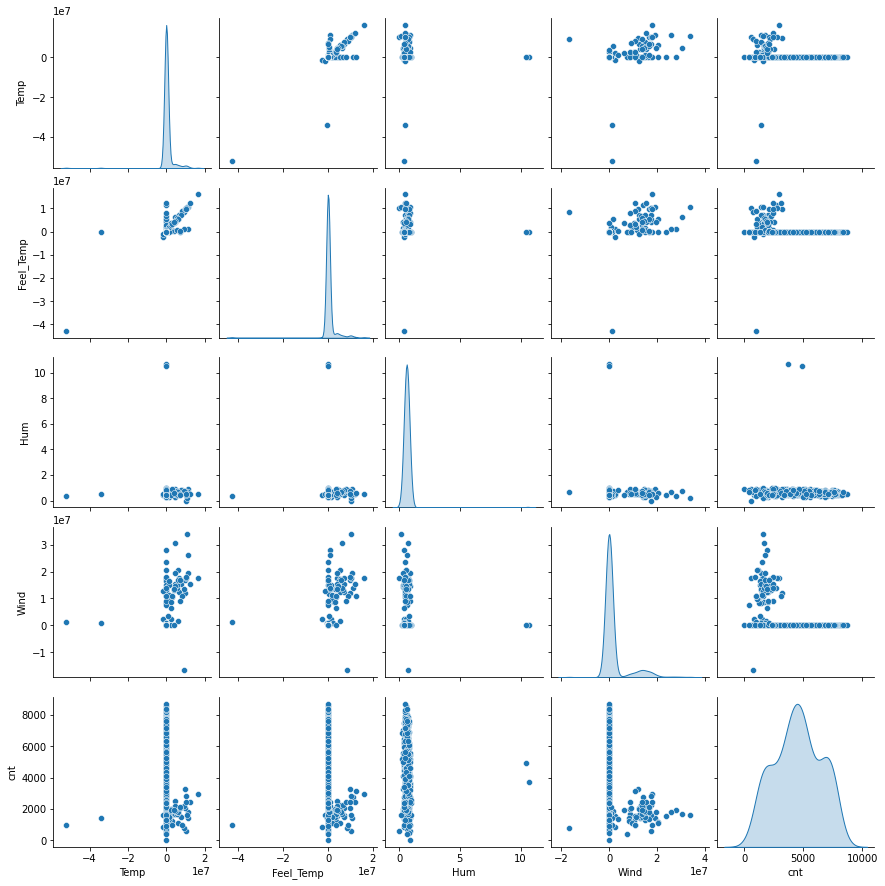

In [40]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'Temp', 'Feel_Temp', 'Hum', 'Wind','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' 

## Visualising Catagorical Variables

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 212 to 419
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   508 non-null    float64
 1   Month                                  508 non-null    float64
 2   Day                                    508 non-null    float64
 3   Temp                                   508 non-null    float64
 4   Feel_Temp                              508 non-null    float64
 5   Hum                                    508 non-null    float64
 6   Wind                                   508 non-null    float64
 7   cnt                                    508 non-null    float64
 8   Season_Springer                        508 non-null    uint8  
 9   Season_Summer                          508 non-null    uint8  
 10  Season_Winter                          508 non-null    uint8  
 11  Holi

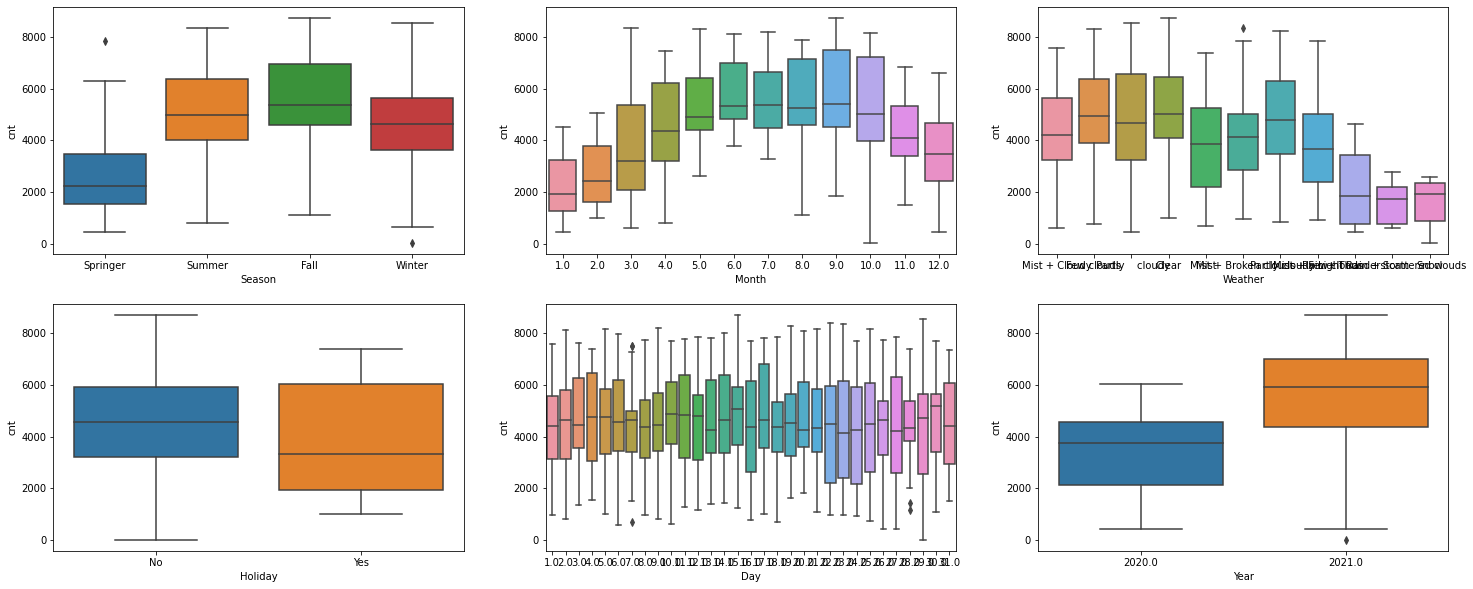

In [43]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'Month', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'Weather', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'Holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'Day', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'Year', y = 'cnt', data = bike)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 



## Correlation Matrix

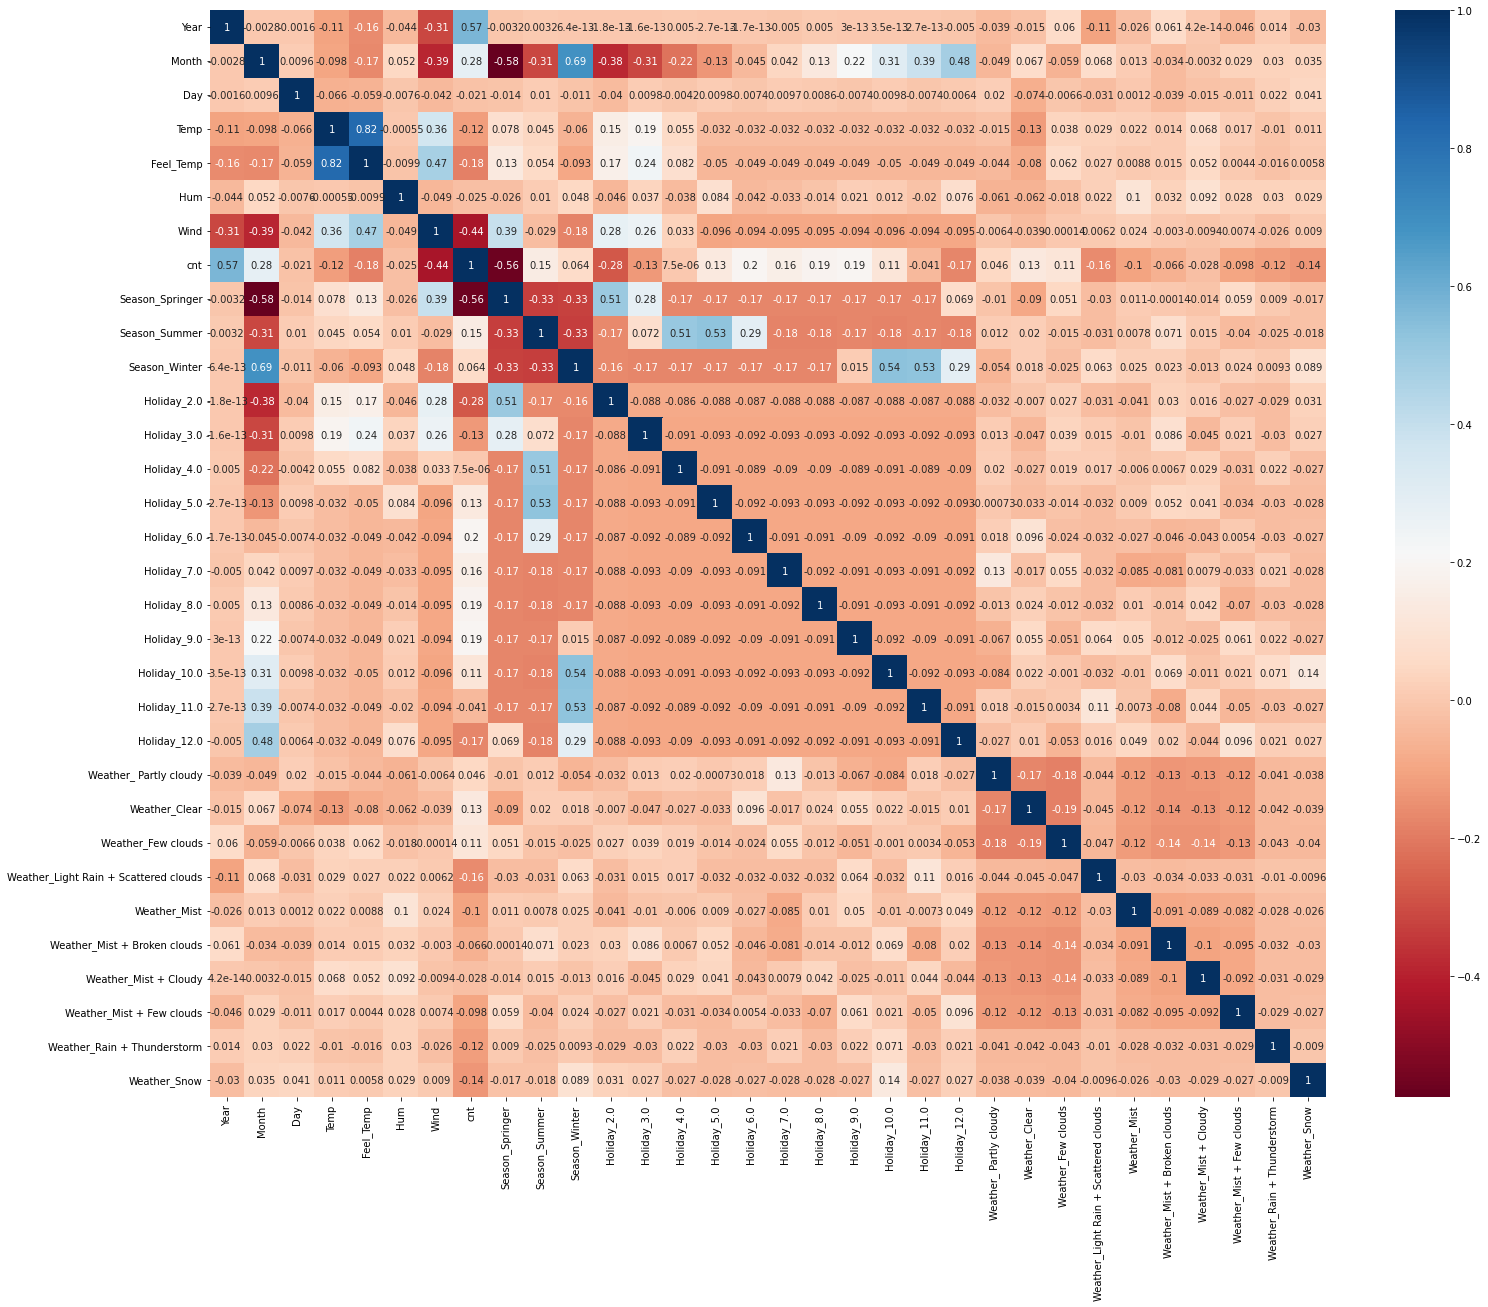

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# RESCALING THE FEATURES

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
# Checking the values before scaling
df_train.head()

,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,cnt,Season_Springer,Season_Summer,...,Weather_ Partly cloudy,Weather_Clear,Weather_Few clouds,Weather_Light Rain + Scattered clouds,Weather_Mist,Weather_Mist + Broken clouds,Weather_Mist + Cloudy,Weather_Mist + Few clouds,Weather_Rain + Thunderstorm,Weather_Snow
212,2020.0,8.0,2.0,2.881665e+01,2.523234e+01,0.491250,1.379195e+01,4845.0,0,0,...,0,1,0,0,0,0,0,0,0,0
710,2021.0,12.0,15.0,7.235849e+00,7.904001e+00,0.650417,7.125450e+00,5047.0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,2020.0,1.0,9.0,-1.498349e+06,-2.539775e+06,0.434167,2.425065e+06,822.0,1,0,...,1,0,0,0,0,0,0,0,0,0
500,2021.0,5.0,18.0,1.851585e+01,1.790269e+01,0.523333,9.166739e+00,7639.0,0,1,...,0,0,0,0,0,0,0,0,0,0
324,2020.0,11.0,23.0,1.271915e+01,1.223524e+01,0.757917,2.250027e+01,2566.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df_train.columns

Index(['Year', 'Month', 'Day', 'Temp', 'Feel_Temp', 'Hum', 'Wind', 'cnt',
       'Season_Springer', 'Season_Summer', 'Season_Winter', 'Holiday_2.0',
       'Holiday_3.0', 'Holiday_4.0', 'Holiday_5.0', 'Holiday_6.0',
       'Holiday_7.0', 'Holiday_8.0', 'Holiday_9.0', 'Holiday_10.0',
       'Holiday_11.0', 'Holiday_12.0', 'Weather_ Partly cloudy',
       'Weather_Clear', 'Weather_Few clouds',
       'Weather_Light Rain + Scattered clouds', 'Weather_Mist',
       'Weather_Mist + Broken clouds', 'Weather_Mist + Cloudy',
       'Weather_Mist + Few clouds', 'Weather_Rain + Thunderstorm',
       'Weather_Snow'],
      dtype='object')

In [49]:
# Apply scaler() to all the numeric variables

num_vars = ['Temp', 'Feel_Temp', 'Hum', 'Wind','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
# Checking values after scaling
df_train.head()

,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,cnt,Season_Springer,Season_Summer,...,Weather_ Partly cloudy,Weather_Clear,Weather_Few clouds,Weather_Light Rain + Scattered clouds,Weather_Mist,Weather_Mist + Broken clouds,Weather_Mist + Cloudy,Weather_Mist + Few clouds,Weather_Rain + Thunderstorm,Weather_Snow
212,2020.0,8.0,2.0,0.759653,0.727283,0.046067,0.328755,0.554878,0,0,...,0,1,0,0,0,0,0,0,0,0
710,2021.0,12.0,15.0,0.759653,0.727283,0.060993,0.328755,0.578118,0,0,...,0,1,0,0,0,0,0,0,0,0
8,2020.0,1.0,9.0,0.737851,0.684163,0.040714,0.376631,0.092039,1,0,...,1,0,0,0,0,0,0,0,0,0
500,2021.0,5.0,18.0,0.759653,0.727283,0.049076,0.328755,0.876323,0,1,...,0,0,0,0,0,0,0,0,0,0
324,2020.0,11.0,23.0,0.759653,0.727283,0.071074,0.328755,0.292683,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df_train.describe()

,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,cnt,Season_Springer,Season_Summer,...,Weather_ Partly cloudy,Weather_Clear,Weather_Few clouds,Weather_Light Rain + Scattered clouds,Weather_Mist,Weather_Mist + Broken clouds,Weather_Mist + Cloudy,Weather_Mist + Few clouds,Weather_Rain + Thunderstorm,Weather_Snow
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,...,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,2020.500000,6.484252,15.838583,0.764905,0.735520,0.062319,0.364878,0.517092,0.248031,0.259843,...,0.141732,0.159449,0.165354,0.005906,0.084646,0.086614,0.092520,0.082677,0.003937,0.011811
std,0.500493,3.445511,8.836535,0.050300,0.047874,0.059977,0.104962,0.226349,0.432296,0.438980,...,0.349119,0.366455,0.371866,0.076696,0.278628,0.281546,0.290044,0.275665,0.062684,0.108141
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,4.000000,8.000000,0.759653,0.727283,0.048285,0.328755,0.355787,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.500000,6.000000,16.000000,0.759653,0.727283,0.059567,0.328755,0.521054,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,9.000000,23.000000,0.759653,0.727283,0.068515,0.328755,0.694432,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)            # running RFE
rfe = rfe.fit(X_train, y_train)


In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Month', False, 14),
 ('Day', False, 17),
 ('Temp', True, 1),
 ('Feel_Temp', False, 10),
 ('Hum', True, 1),
 ('Wind', True, 1),
 ('Season_Springer', True, 1),
 ('Season_Summer', False, 15),
 ('Season_Winter', False, 5),
 ('Holiday_2.0', False, 9),
 ('Holiday_3.0', False, 7),
 ('Holiday_4.0', False, 8),
 ('Holiday_5.0', False, 4),
 ('Holiday_6.0', True, 1),
 ('Holiday_7.0', False, 3),
 ('Holiday_8.0', False, 2),
 ('Holiday_9.0', True, 1),
 ('Holiday_10.0', False, 16),
 ('Holiday_11.0', True, 1),
 ('Holiday_12.0', True, 1),
 ('Weather_ Partly cloudy', False, 13),
 ('Weather_Clear', False, 12),
 ('Weather_Few clouds', False, 11),
 ('Weather_Light Rain + Scattered clouds', True, 1),
 ('Weather_Mist', True, 1),
 ('Weather_Mist + Broken clouds', True, 1),
 ('Weather_Mist + Cloudy', False, 6),
 ('Weather_Mist + Few clouds', True, 1),
 ('Weather_Rain + Thunderstorm', True, 1),
 ('Weather_Snow', True, 1)]

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'Temp', 'Hum', 'Wind', 'Season_Springer', 'Holiday_6.0',
       'Holiday_9.0', 'Holiday_11.0', 'Holiday_12.0',
       'Weather_Light Rain + Scattered clouds', 'Weather_Mist',
       'Weather_Mist + Broken clouds', 'Weather_Mist + Few clouds',
       'Weather_Rain + Thunderstorm', 'Weather_Snow'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['Month', 'Day', 'Feel_Temp', 'Season_Summer', 'Season_Winter',
       'Holiday_2.0', 'Holiday_3.0', 'Holiday_4.0', 'Holiday_5.0',
       'Holiday_7.0', 'Holiday_8.0', 'Holiday_10.0', 'Weather_ Partly cloudy',
       'Weather_Clear', 'Weather_Few clouds', 'Weather_Mist + Cloudy'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temp,275.75
0,Year,243.08
3,Wind,19.34
2,Hum,2.17
4,Season_Springer,1.78
7,Holiday_11.0,1.23
8,Holiday_12.0,1.20
5,Holiday_6.0,1.19
6,Holiday_9.0,1.18
10,Weather_Mist,1.15


In [64]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [65]:
# Check the parameters obtained

lr1.params

const                                   -491.079938
Year                                       0.243340
Temp                                       0.109763
Hum                                        0.090296
Wind                                      -0.159772
Season_Springer                           -0.272039
Holiday_6.0                                0.059454
Holiday_9.0                                0.084361
Holiday_11.0                              -0.122766
Holiday_12.0                              -0.083355
Weather_Light Rain + Scattered clouds     -0.128597
Weather_Mist                              -0.103599
Weather_Mist + Broken clouds              -0.090825
Weather_Mist + Few clouds                 -0.086034
Weather_Rain + Thunderstorm               -0.280959
Weather_Snow                              -0.340830
dtype: float64

In [66]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     118.8
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          1.16e-152
Time:                        13:27:42   Log-Likelihood:                 423.27
No. Observations:                 508   AIC:                            -814.5
Df Residuals:                     492   BIC:                            -746.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Model 2

- Removing the variable 'Hum' based on its High p-value & High VIF

In [70]:
X_train_new = X_train_rfe.drop(["Hum"], axis = 1)

### VIF Check

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Temp,275.68
0,Year,242.17
2,Wind,19.28
3,Season_Springer,1.78
6,Holiday_11.0,1.23
4,Holiday_6.0,1.19
7,Holiday_12.0,1.19
5,Holiday_9.0,1.18
11,Weather_Mist + Few clouds,1.15
9,Weather_Mist,1.13


In [72]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [73]:
# Check the parameters obtained

lr2.params

const                                   -490.137256
Year                                       0.242876
Temp                                       0.111761
Wind                                      -0.164104
Season_Springer                           -0.272010
Holiday_6.0                                0.058668
Holiday_9.0                                0.084407
Holiday_11.0                              -0.123110
Holiday_12.0                              -0.081508
Weather_Light Rain + Scattered clouds     -0.128220
Weather_Mist                              -0.100850
Weather_Mist + Broken clouds              -0.089851
Weather_Mist + Few clouds                 -0.085252
Weather_Rain + Thunderstorm               -0.279785
Weather_Snow                              -0.338896
dtype: float64

In [74]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     127.2
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          1.88e-153
Time:                        13:29:34   Log-Likelihood:                 422.62
No. Observations:                 508   AIC:                            -815.2
Df Residuals:                     493   BIC:                            -751.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Model 3

 - Removing the variable 'Year' based on its Very High 'VIF' value.
.

In [80]:
X_train_new = X_train_new.drop(["Year"], axis = 1)

### VIF Check

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temp,2.43
1,Season_Springer,1.51
4,Holiday_11.0,1.21
2,Holiday_6.0,1.18
3,Holiday_9.0,1.17
5,Holiday_12.0,1.16
9,Weather_Mist + Few clouds,1.14
7,Weather_Mist,1.13
8,Weather_Mist + Broken clouds,1.13
6,Weather_Light Rain + Scattered clouds,1.04


In [82]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [83]:
lr3.params

const                                    0.790335
Temp                                    -0.222153
Season_Springer                         -0.291154
Holiday_6.0                              0.077087
Holiday_9.0                              0.092630
Holiday_11.0                            -0.103264
Holiday_12.0                            -0.065105
Weather_Light Rain + Scattered clouds   -0.255574
Weather_Mist                            -0.117492
Weather_Mist + Broken clouds            -0.045778
Weather_Mist + Few clouds               -0.121923
Weather_Rain + Thunderstorm             -0.153755
Weather_Snow                            -0.379837
dtype: float64

In [84]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     38.03
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           1.26e-62
Time:                        13:30:40   Log-Likelihood:                 200.36
No. Observations:                 508   AIC:                            -374.7
Df Residuals:                     495   BIC:                            -319.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Model 4

- Removing the variable 'Season_Springer' based on its Very High 'VIF' value.


In [86]:
X_train_new = X_train_new.drop(["Season_Springer"], axis = 1)

### VIF Check

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temp,1.83
3,Holiday_11.0,1.16
4,Holiday_12.0,1.15
8,Weather_Mist + Few clouds,1.14
1,Holiday_6.0,1.13
6,Weather_Mist,1.13
7,Weather_Mist + Broken clouds,1.13
2,Holiday_9.0,1.12
5,Weather_Light Rain + Scattered clouds,1.03
9,Weather_Rain + Thunderstorm,1.02


In [88]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [89]:
# Check the parameters obtained

lr4.params

const                                    0.850027
Temp                                    -0.419178
Holiday_6.0                              0.170117
Holiday_9.0                              0.187292
Holiday_11.0                            -0.008164
Holiday_12.0                            -0.074921
Weather_Light Rain + Scattered clouds   -0.316216
Weather_Mist                            -0.130029
Weather_Mist + Broken clouds            -0.052793
Weather_Mist + Few clouds               -0.142807
Weather_Rain + Thunderstorm             -0.204445
Weather_Snow                            -0.334545
dtype: float64

In [90]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     11.82
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           9.28e-20
Time:                        13:31:22   Log-Likelihood:                 93.524
No. Observations:                 508   AIC:                            -163.0
Df Residuals:                     496   BIC:                            -112.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Model 5

- Removing the variable 'Holiday_11.0' based on its Very High p-value.

In [91]:
X_train_new = X_train_new.drop(["Holiday_11.0"], axis = 1)

### VIF Check

In [92]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temp,1.65
3,Holiday_12.0,1.14
7,Weather_Mist + Few clouds,1.14
5,Weather_Mist,1.13
6,Weather_Mist + Broken clouds,1.13
1,Holiday_6.0,1.11
2,Holiday_9.0,1.11
8,Weather_Rain + Thunderstorm,1.02
9,Weather_Snow,1.02
4,Weather_Light Rain + Scattered clouds,1.01


In [93]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [94]:
# Check the parameters obtained

lr5.params

const                                    0.847304
Temp                                    -0.416858
Holiday_6.0                              0.171051
Holiday_9.0                              0.188176
Holiday_12.0                            -0.074075
Weather_Light Rain + Scattered clouds   -0.320814
Weather_Mist                            -0.130111
Weather_Mist + Broken clouds            -0.052208
Weather_Mist + Few clouds               -0.142614
Weather_Rain + Thunderstorm             -0.203908
Weather_Snow                            -0.333751
dtype: float64

In [95]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     13.02
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           2.56e-20
Time:                        13:32:07   Log-Likelihood:                 93.494
No. Observations:                 508   AIC:                            -165.0
Df Residuals:                     497   BIC:                            -118.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Model 6

- Removing the variable 'Holiday_9.0' based on its High 'p-value'.

In [98]:
X_train_new = X_train_new.drop(["Holiday_9.0"], axis = 1)

### VIF Check

In [99]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temp,1.55
6,Weather_Mist + Few clouds,1.14
2,Holiday_12.0,1.13
4,Weather_Mist,1.13
5,Weather_Mist + Broken clouds,1.13
1,Holiday_6.0,1.10
7,Weather_Rain + Thunderstorm,1.02
8,Weather_Snow,1.02
3,Weather_Light Rain + Scattered clouds,1.01


In [100]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [101]:
# Check the parameters obtained

lr6.params

const                                    0.891573
Temp                                    -0.453834
Holiday_6.0                              0.153261
Holiday_12.0                            -0.093246
Weather_Light Rain + Scattered clouds   -0.335148
Weather_Mist                            -0.124586
Weather_Mist + Broken clouds            -0.048943
Weather_Mist + Few clouds               -0.130662
Weather_Rain + Thunderstorm             -0.210501
Weather_Snow                            -0.346322
dtype: float64

In [102]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     10.51
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           5.87e-15
Time:                        13:33:01   Log-Likelihood:                 78.585
No. Observations:                 508   AIC:                            -137.2
Df Residuals:                     498   BIC:                            -94.86
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Insights
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### Insights
- From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.


## The equation of best fitted surface based on model lr6:

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [103]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

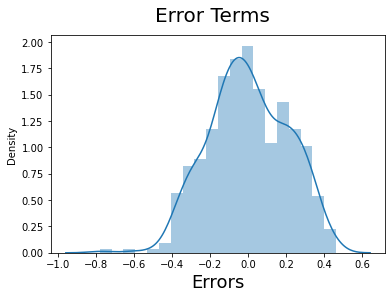

In [104]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

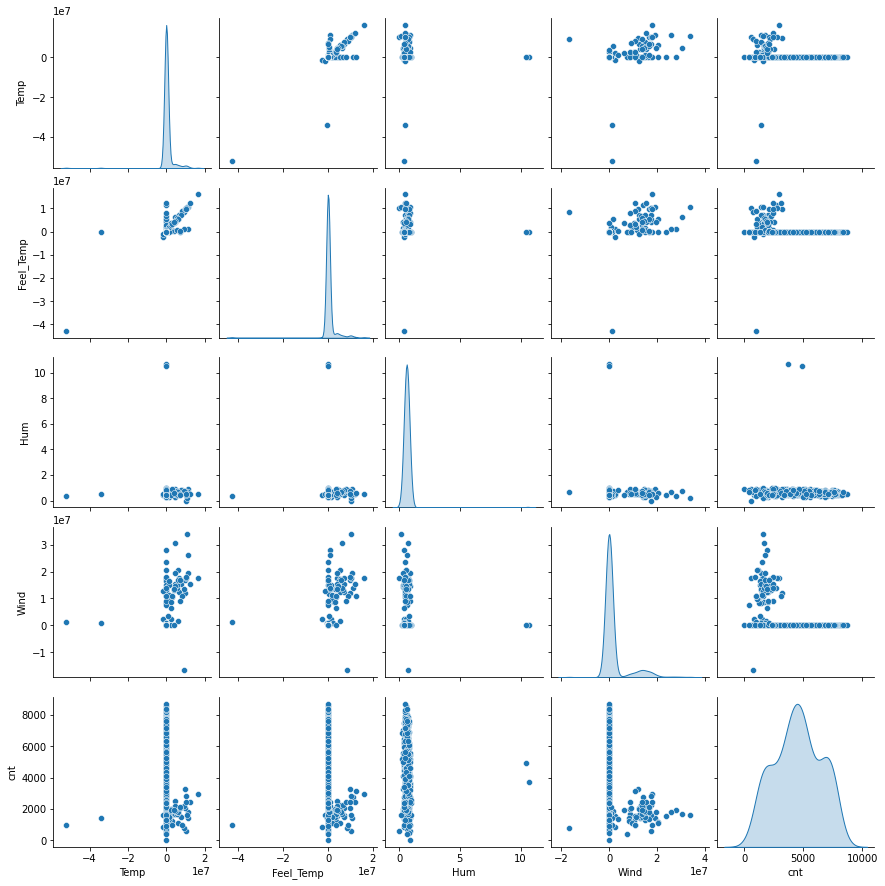

In [105]:
bike_new=bike_new[[ 'Temp', 'Feel_Temp', 'Hum', 'Wind','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Insight
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temp,1.55
6,Weather_Mist + Few clouds,1.14
2,Holiday_12.0,1.13
4,Weather_Mist,1.13
5,Weather_Mist + Broken clouds,1.13
1,Holiday_6.0,1.10
7,Weather_Rain + Thunderstorm,1.02
8,Weather_Snow,1.02
3,Weather_Light Rain + Scattered clouds,1.01


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [108]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['Temp', 'Feel_Temp', 'Hum', 'Wind','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [109]:
df_test.head()

,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,cnt,Season_Springer,Season_Summer,...,Weather_ Partly cloudy,Weather_Clear,Weather_Few clouds,Weather_Light Rain + Scattered clouds,Weather_Mist,Weather_Mist + Broken clouds,Weather_Mist + Cloudy,Weather_Mist + Few clouds,Weather_Rain + Thunderstorm,Weather_Snow
373,2021.0,1.0,11.0,0.759653,0.727282,0.079475,0.328755,0.247929,1,0,...,0,0,0,0,0,1,0,0,0,0
714,2021.0,12.0,19.0,0.759653,0.727283,0.058649,0.328755,0.603428,0,0,...,0,0,1,0,0,0,0,0,0,0
265,2020.0,9.0,25.0,0.759653,0.727283,0.079240,0.328754,0.573861,0,0,...,0,0,0,0,0,0,1,0,0,0
466,2021.0,4.0,14.0,0.759653,0.727283,0.047161,0.328755,0.855729,0,1,...,0,0,1,0,0,0,0,0,0,0
706,2021.0,12.0,11.0,0.759653,0.727283,0.055953,0.328755,0.630350,0,0,...,0,0,0,0,1,0,0,0,0,0


In [110]:
df_test.describe()

,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,cnt,Season_Springer,Season_Summer,...,Weather_ Partly cloudy,Weather_Clear,Weather_Few clouds,Weather_Light Rain + Scattered clouds,Weather_Mist,Weather_Mist + Broken clouds,Weather_Mist + Cloudy,Weather_Mist + Few clouds,Weather_Rain + Thunderstorm,Weather_Snow
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,2020.500000,6.600917,15.431193,0.764865,0.735876,0.063662,0.366161,0.515266,0.243119,0.233945,...,0.155963,0.133028,0.155963,0.022936,0.045872,0.114679,0.087156,0.068807,0.022936,0.0
std,0.501151,3.473587,8.796592,0.047689,0.058812,0.066319,0.140241,0.214423,0.429954,0.424312,...,0.363656,0.340386,0.363656,0.150043,0.209688,0.319367,0.282713,0.253709,0.150043,0.0
min,2020.000000,1.000000,1.000000,0.255706,0.157752,0.027195,0.328754,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2020.000000,4.000000,8.000000,0.759653,0.727283,0.050199,0.328755,0.383485,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2020.500000,7.000000,15.500000,0.759653,0.727283,0.058340,0.328755,0.521054,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2021.000000,10.000000,23.000000,0.759653,0.727283,0.068700,0.328755,0.663570,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2021.000000,12.000000,31.000000,1.035333,1.024694,1.019068,1.513476,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Dividing into X_test and y_test

In [111]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 373 to 719
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   218 non-null    float64
 1   Month                                  218 non-null    float64
 2   Day                                    218 non-null    float64
 3   Temp                                   218 non-null    float64
 4   Feel_Temp                              218 non-null    float64
 5   Hum                                    218 non-null    float64
 6   Wind                                   218 non-null    float64
 7   Season_Springer                        218 non-null    uint8  
 8   Season_Summer                          218 non-null    uint8  
 9   Season_Winter                          218 non-null    uint8  
 10  Holiday_2.0                            218 non-null    uint8  
 11  Holi

In [112]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 373 to 719
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  218 non-null    float64
 1   Temp                                   218 non-null    float64
 2   Holiday_6.0                            218 non-null    uint8  
 3   Holiday_12.0                           218 non-null    uint8  
 4   Weather_Light Rain + Scattered clouds  218 non-null    uint8  
 5   Weather_Mist                           218 non-null    uint8  
 6   Weather_Mist + Broken clouds           218 non-null    uint8  
 7   Weather_Mist + Few clouds              218 non-null    uint8  
 8   Weather_Rain + Thunderstorm            218 non-null    uint8  
 9   Weather_Snow                           218 non-null    uint8  
dtypes: float64(2), uint8(8)
memory usage: 6.8 KB


In [113]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION

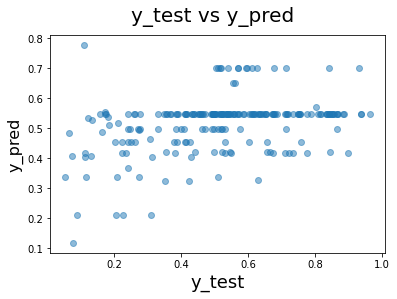

In [114]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12542376148065615

## Adjusted R^2 Value for TEST

In [119]:
# We already have the value of R^2 (calculated in above step)

r2=0.12542376148065615

In [120]:
# Get the shape of X_test
X_test.shape


(218, 9)

In [121]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.08758152039087697

# Final Result Comparison

- Train R^2 :0.824
- Train Adjusted R^2 :0.821 
- Test R^2 :0.12542376148065615
- Test Adjusted R^2 :0.08758152039087697
